## **1. Import Required Libraries**

In [1]:
# for numerical opreations
import numpy as np

# for data handling (dataframes)
import pandas as pd

# for data visualization
import matplotlib.pyplot as plt

## **2. Load the Dataset**

In [2]:
# read the csv file into a pandas dataframe
df = pd.read_csv('placement.csv')

## **3. Basic Data Inspection**

In [3]:
# display first 5 rows of the dataset
print(df.head())

   Unnamed: 0  cgpa     iq  placement
0           0   6.8  123.0          1
1           1   5.9  106.0          0
2           2   5.3  121.0          0
3           3   7.4  132.0          1
4           4   5.8  142.0          0


In [4]:
# display info. about columns, data types & missing values
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  100 non-null    int64  
 1   cgpa        100 non-null    float64
 2   iq          100 non-null    float64
 3   placement   100 non-null    int64  
dtypes: float64(2), int64(2)
memory usage: 3.3 KB
None


In [5]:
# check the shape of the dataset (rows, columns)
print(df.shape)

(100, 4)


## **4. Data Cleaning**

In [6]:
# the column "Unnamed: 0" is just an index column from csv
# so we remove it using iloc (keep all columns, rows from index 1 onward)
df = df.iloc[:, 1:]

In [7]:
# verify after dropping the column
print(df.head())

   cgpa     iq  placement
0   6.8  123.0          1
1   5.9  106.0          0
2   5.3  121.0          0
3   7.4  132.0          1
4   5.8  142.0          0


## **5. Problem Understanding**

In [8]:
# Goal: Predict whether a student gets placement (1 or 0) based on - cgpa, iq
# Steps in ML pipeline:
# 0. Preprocess + EDA + Feature Selection
# 1. Extract input (x) and output (y)
# 2. Scale the values
# 3. Train-test split
# 4. Train the model
# 5. Evaluate the model
# 6. Deploy the model (optional)

## **6. Data Visualization**

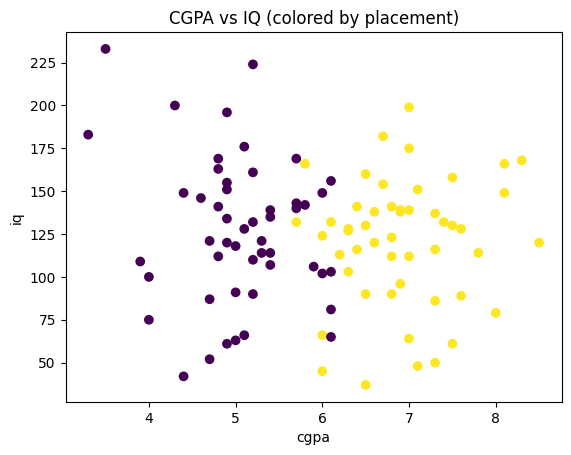

In [9]:
# scatter plot of cgpa vs iq
# color coded by placement (0 = not placed, 1 = placed)
plt.scatter(df['cgpa'], df['iq'], c=df['placement'])
plt.xlabel('cgpa')
plt.ylabel('iq')
plt.title("CGPA vs IQ (colored by placement)")
plt.show()

## **7. Feature Selection (x and y)**

In [10]:
# x - input features
x = df[['cgpa', 'iq']]

# y - output features
y = df['placement']

## **8. Train-test Split**

In [11]:
from sklearn.model_selection import train_test_split

# split data into training (80%) & testing (20%)
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=2)

## **9. Feature Scaling**

In [12]:
from sklearn.preprocessing import StandardScaler

# StandardScalar makes mean = 0 and std = 1
scaler = StandardScaler()

# fit scaler on training data and transform both train and test
x_train_scaled = scaler.fit_transform(x_train)
x_test_scaled = scaler.transform(x_test)

## **10. Train the Model**

In [13]:
from sklearn.linear_model import LogisticRegression

# create logistic regression model
model = LogisticRegression()

# train the model on scaled training data
model.fit(x_train_scaled, y_train)

LogisticRegression()

## **11. Model Evaluation**

In [14]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# make prediction on test data
y_pred = model.predict(x_test_scaled)

# calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

# confusion matrix
cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:\n", cm)

# detailed classification report
cr = classification_report(y_test, y_pred)
print("Classification Report:\n", cr)

Accuracy: 0.9
Confusion Matrix:
 [[ 7  2]
 [ 0 11]]
Classification Report:
               precision    recall  f1-score   support

           0       1.00      0.78      0.88         9
           1       0.85      1.00      0.92        11

    accuracy                           0.90        20
   macro avg       0.92      0.89      0.90        20
weighted avg       0.92      0.90      0.90        20



## **12. Predict for a New Student**

In [15]:
# example new input : CGPA = 7.5, IQ = 120
new_data = np.array([[7.5, 120]])

# scale the new input using the same scaler
new_data_scaled = scaler.transform(new_data)

# predict placement
prediction = model.predict(new_data_scaled)

if prediction[0] == 1:
  print("The student is likely to get placed.")
else:
  print("The student is not likely to get placed.")

The student is likely to get placed.


/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
